Install all the libraries

In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 604 kB 53.6 MB/s 
     |████████████████████████████████| 47.6 MB 2.3 MB/s 
     |████████████████████████████████| 145 kB 52.1 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

Reading the image,Grayscaling,Blurrring the image

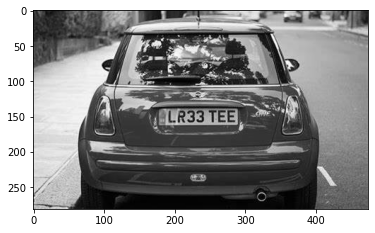

In [ ]:
img = cv2.imread('car2.jpeg') #Reading the image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Grayscaling the image
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)) # Plotting the image

Applying the Filters and edge localization....
Filters is used to reduce the noise

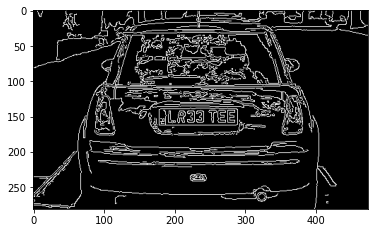

In [ ]:
bfilter = cv2.bilateralFilter(gray,11,17,17) # Applying filter for noise reduction
edged = cv2.Canny(bfilter,40,200) # Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

Find contours and apply masks

In [ ]:
keypoint = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # Finding the shapes,returned a tree so as to traverse different levels of contour,chain approx returns a simplified version of the contour
contours = imutils.grab_contours(keypoint) # grabbing the contours from the keypoints
contours = sorted(contours,key = cv2.contourArea,reverse=True)[:10] # return the top 10 contours based on their area

In [ ]:

location = None
for contour in contours: #looping theough the contours to get the location
  approx = cv2.approxPolyDP(contour,15,True) #Using the approxPolyDP to approxiamte the polygon form the contour
  if len(approx) == 4:
    location = approx
    break

In [ ]:
location

array([[[178, 140]],

       [[178, 162]],

       [[289, 161]],

       [[288, 139]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape,np.uint8) # created a blank mask, filling is done wiht blank 0's
ne_img = cv2.drawContours(mask,[location],0,255,-1) # drawn the contour based on th location
new_img = cv2.bitwise_and(img,img,mask=mask) # Overlaying the mask on the original image and return the segment pf the imsge that has the number plate

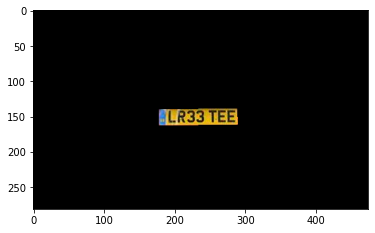

In [ ]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255) # storing the location where the img isn't black
(x1,y1) = (np.min(x),np.min(y)) # getting the min x and y value
(x2,y2) = (np.max(x),np.max(y)) # getting the maximum x and y value
cropped_img = gray[x1:x2+1,y1:y2+1] # cropped the image to absed on the above coordinates

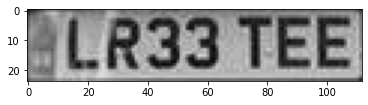

In [ ]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

Yse EasyOCR to read the text

In [ ]:
reader = easyocr.Reader(['en']) # Chosen the language english
result = reader.readtext(cropped_img) # reading the textform the cropped image 
result

[([[8, 0], [112, 0], [112, 24], [8, 24]], 'Lr33 TEE', 0.5776526667803147)]

In [ ]:
result[0][-2]

'Lr33 TEE'

Rendering the result to the img

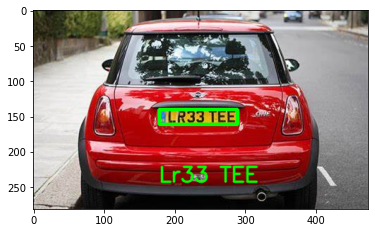

In [ ]:

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0],approx[1][0][1]+80), fontFace = font, fontScale=1,color=(0,255,0),thickness=2, lineType=cv2.LINE_AA)
res  = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))